## Brand sentiment analysis

In [1]:
#import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import dataset - read csv file

In [4]:
dataset = pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\final_data.csv")

In [5]:
dataset.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,I have a 3G iPhone. After 3 hrs tweeting at #...,iPhone,Negative emotion
1,Know about @fludapp ? Awesome iPad/iPhone app...,iPad or iPhone App,Positive emotion
2,Can not wait for #iPad 2 also. They should sal...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [6]:
dataset.columns=['text','product','emotion']
dataset.head()

,text,product,emotion
0,I have a 3G iPhone. After 3 hrs tweeting at #...,iPhone,Negative emotion
1,Know about @fludapp ? Awesome iPad/iPhone app...,iPad or iPhone App,Positive emotion
2,Can not wait for #iPad 2 also. They should sal...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9092 non-null   object
 1   product  3291 non-null   object
 2   emotion  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [8]:
dataset.isnull()

,text,product,emotion
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9088,False,False,False
9089,False,True,False
9090,False,True,False
9091,False,True,False


<Axes: >

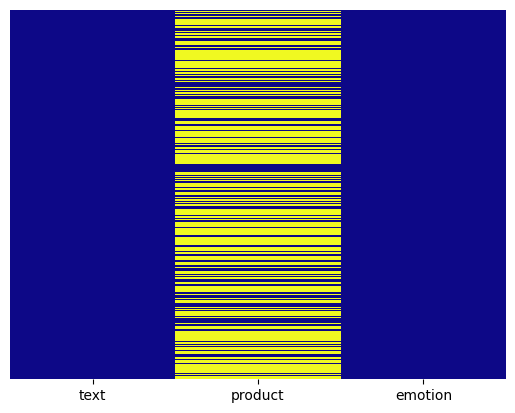

In [9]:
sns.heatmap(dataset.isnull(),cmap='plasma',cbar=False,yticklabels=False)

###### most of the values in the product column are null values and hence would not provide great insights for the data, so it would be better to drop the column

In [10]:
dataset.drop('product',axis=1,inplace=True)
dataset.head()

,text,emotion
0,I have a 3G iPhone. After 3 hrs tweeting at #...,Negative emotion
1,Know about @fludapp ? Awesome iPad/iPhone app...,Positive emotion
2,Can not wait for #iPad 2 also. They should sal...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [11]:
dataset.isnull().sum()

text       1
emotion    0
dtype: int64

In [12]:
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9092 non-null   object
 1   emotion  9092 non-null   object
dtypes: object(2)
memory usage: 213.1+ KB


##### All the null values have been removed from the dataset and so we can proceed to the part of Text Preprocessing

In [13]:
#Preprocessing

In [14]:
dataset['emotion'].value_counts()

emotion
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [15]:
dataset['emotion'].replace("I can't tell","No emotion toward brand or product",inplace=True)
dataset['emotion'].replace("No emotion toward brand or product", "Neutral", inplace=True)
dataset['emotion'].replace("Negative emotion", "Negative", inplace=True)
dataset['emotion'].replace("Positive emotion", "Positive", inplace=True)
dataset['emotion'].value_counts()

emotion
Neutral     5544
Positive    2978
Negative     570
Name: count, dtype: int64

In [16]:
'''mapping each of the types to a numeric value
"Negative emotion" -----> 0
"No emotion toward brand or product" -----> 1
"Positive emotion" -----> 2'''
dataset['emotion']=dataset['emotion'].map({"Negative":0,"Neutral":1,"Positive":2})

In [17]:
dataset['emotion'].value_counts()

emotion
1    5544
2    2978
0     570
Name: count, dtype: int64

In [18]:
dataset.head()

,text,emotion
0,I have a 3G iPhone. After 3 hrs tweeting at #...,0
1,Know about @fludapp ? Awesome iPad/iPhone app...,2
2,Can not wait for #iPad 2 also. They should sal...,2
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,2


### Data visualisation

In [19]:
pip install wordcloud


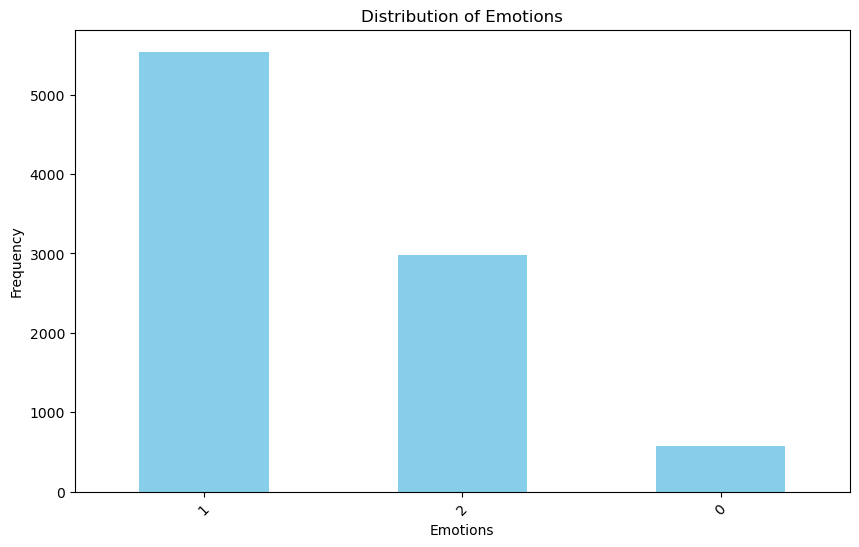

In [20]:
def plot_emotion_distribution(dataset):
    emotion_counts = dataset['emotion'].value_counts()
    plt.figure(figsize=(10, 6))
    emotion_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Emotions')
    plt.ylabel('Frequency')
    plt.title('Distribution of Emotions')
    plt.xticks(rotation=45)
    plt.show()

plot_emotion_distribution(dataset)

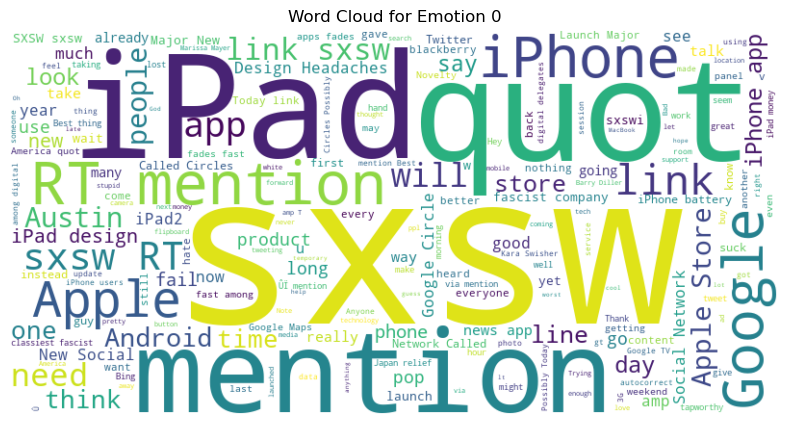

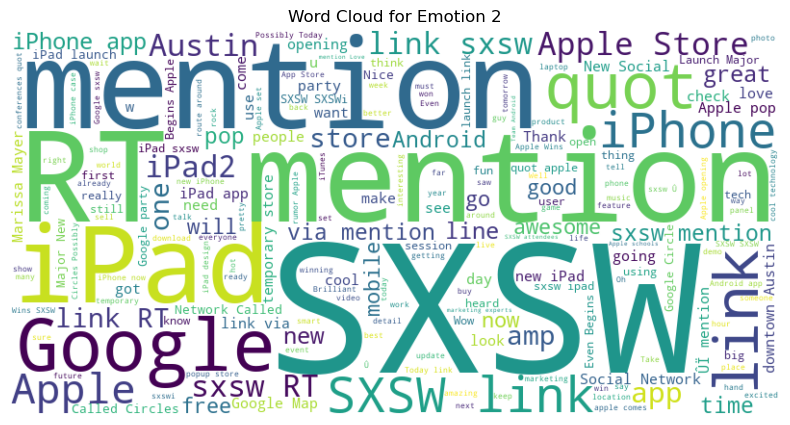

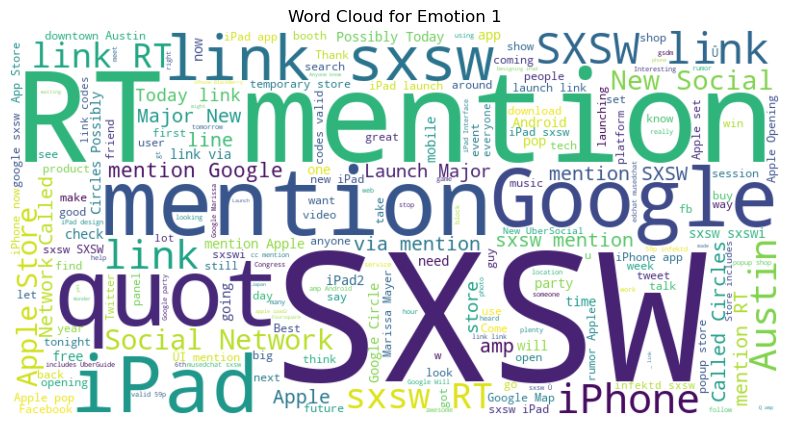

In [21]:
# Import the required libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(dataset):
    emotions = dataset['emotion'].unique()
    for emotion in emotions:
        text = " ".join(dataset[dataset['emotion'] == emotion]['text'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Emotion {emotion}')
        plt.show()
plot_word_cloud(dataset)

### Natural Language Processing

In [22]:
import re
# converting the text to lowercase
dataset['text']=dataset['text'].apply(lambda x:x.lower())
dataset.head()

,text,emotion
0,i have a 3g iphone. after 3 hrs tweeting at #...,0
1,know about @fludapp ? awesome ipad/iphone app...,2
2,can not wait for #ipad 2 also. they should sal...,2
3,@sxsw i hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,2


In [23]:
# removing hyperlinks from the text
import re

# Removing URLs from the text
dataset['text'] = dataset['text'].apply(lambda x: re.sub('http[s]?://\S+', ' ', x))

# Removing non-alphabetical characters from the text
dataset['text'] = dataset['text'].apply(lambda x: re.sub(r'[^a-z]+', ' ', x))

dataset.head()


,text,emotion
0,i have a g iphone after hrs tweeting at rise ...,0
1,know about fludapp awesome ipad iphone app th...,2
2,can not wait for ipad also they should sale th...,2
3,sxsw i hope this year s festival isn t as cra...,0
4,sxtxstate great stuff on fri sxsw marissa may...,2


In [24]:
# multiple spaces to a single space
dataset['text']=dataset['text'].apply(lambda x:" ".join(x.split()))
# adding a column of length for better insights
dataset['length']=dataset['text'].apply(len)
dataset.head(5)


,text,emotion,length
0,i have a g iphone after hrs tweeting at rise a...,0,105
1,know about fludapp awesome ipad iphone app tha...,2,123
2,can not wait for ipad also they should sale th...,2,61
3,sxsw i hope this year s festival isn t as cras...,0,79
4,sxtxstate great stuff on fri sxsw marissa maye...,2,119


C:\Users\prasanna\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


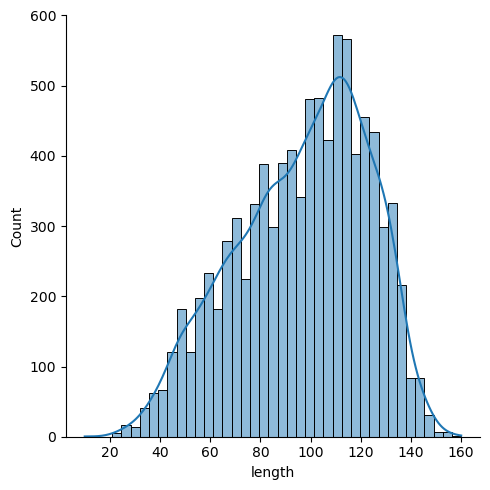

In [25]:
# distribution of the length of the reviews
sns.displot(dataset['length'],kde=True)

<Axes: xlabel='emotion', ylabel='length'>

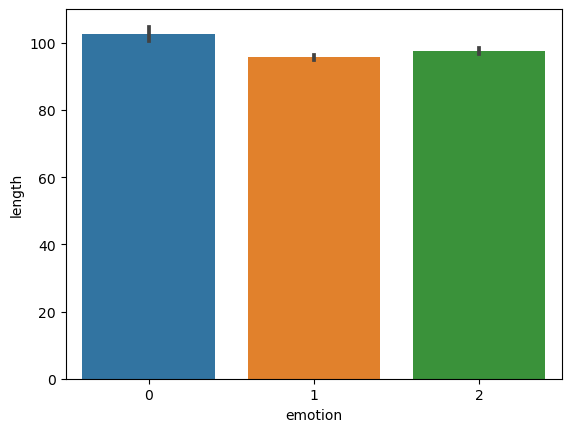

In [26]:
sns.barplot(x='emotion',y='length',data=dataset)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

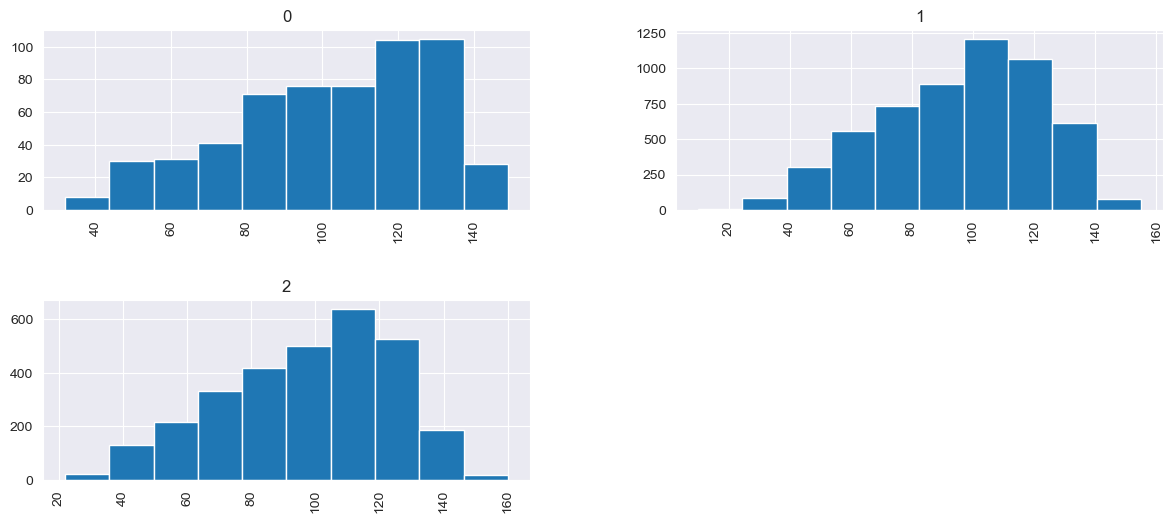

In [27]:
sns.set_style('darkgrid')
dataset.hist(column='length',by='emotion',figsize=(14,6))

In [28]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define a function to preprocess a tweet
def preprocess_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Tokenize the tweet
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


In [29]:
#Tokenizing and removing stopwords
import nltk
from nltk.corpus import stopwords
def stopwords_removal(text):
    return [w for w in text.split() if w not in stopwords.words('english')]
dataset['text']=dataset['text'].apply(stopwords_removal)
dataset.head()

,text,emotion,length
0,"[g, iphone, hrs, tweeting, rise, austin, dead,...",0,105
1,"[know, fludapp, awesome, ipad, iphone, app, li...",2,123
2,"[wait, ipad, also, sale, sxsw]",2,61
3,"[sxsw, hope, year, festival, crashy, year, iph...",0,79
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2,119


In [30]:
dataset.drop('length',axis=1,inplace=True)
from nltk.stem import WordNetLemmatizer
def lemmatizer(text):
    lemma=WordNetLemmatizer()
    return [lemma.lemmatize(w) for w in text]
dataset['text']=dataset['text'].apply(lemmatizer)
dataset.head()

,text,emotion
0,"[g, iphone, hr, tweeting, rise, austin, dead, ...",0
1,"[know, fludapp, awesome, ipad, iphone, app, li...",2
2,"[wait, ipad, also, sale, sxsw]",2
3,"[sxsw, hope, year, festival, crashy, year, iph...",0
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2


In [31]:
def one_letter_word_removal(text):
    return [w for w in text if len(w)>1 and w!="sxsw"]

dataset['text']=dataset['text'].apply(one_letter_word_removal)
dataset.head(5)

,text,emotion
0,"[iphone, hr, tweeting, rise, austin, dead, nee...",0
1,"[know, fludapp, awesome, ipad, iphone, app, li...",2
2,"[wait, ipad, also, sale]",2
3,"[hope, year, festival, crashy, year, iphone, app]",0
4,"[sxtxstate, great, stuff, fri, marissa, mayer,...",2


In [32]:
dataset['text']=dataset['text'].apply(lambda x:" ".join(x))
dataset.head()

,text,emotion
0,iphone hr tweeting rise austin dead need upgra...,0
1,know fludapp awesome ipad iphone app likely ap...,2
2,wait ipad also sale,2
3,hope year festival crashy year iphone app,0
4,sxtxstate great stuff fri marissa mayer google...,2


In [33]:
#Bag of Words transformer
from sklearn.feature_extraction.text import CountVectorizer
# fitting the bow transformer to the text column and transforming it
bow_transformer=CountVectorizer().fit(dataset['text'])
# total number of different words present in the corpus
print(len(bow_transformer.vocabulary_))

8359


#### there are 8359 unique words in the dataset after performing nlp

In [34]:
sample_text=dataset['text'][1]
sample_text

'know fludapp awesome ipad iphone app likely appreciate design also giving free'

In [35]:
# vector representation of the sample_text
bow_sample=bow_transformer.transform([sample_text])
print(bow_sample)

  (0, 202)	1
  (0, 310)	1
  (0, 338)	1
  (0, 518)	1
  (0, 1874)	1
  (0, 2743)	1
  (0, 2831)	1
  (0, 3037)	1
  (0, 3797)	1
  (0, 3805)	1
  (0, 4052)	1
  (0, 4229)	1


In [36]:
text_bow=bow_transformer.transform(dataset['text'])

In [37]:
print("The shape of the matrix is: ",text_bow.shape)
print("The number of non zero values in the matrix: ",text_bow.nnz)
print("Sparcity of the matrix: ",100*text_bow.nnz/(text_bow.shape[0]*text_bow.shape[1]))

The shape of the matrix is:  (9092, 8359)
The number of non zero values in the matrix:  94094
Sparcity of the matrix:  0.123807849123424


##### 9092 different reviews and 7046 unique words in the entire corpus

In [38]:
#Term Frequency - Inverse Document Frequency (Tf-Idf) Transformer
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
tfidf_sample=tfidf_transformer.transform(bow_sample)
print(tfidf_sample)


  (0, 4229)	0.3730794010204612
  (0, 4052)	0.2424134308900068
  (0, 3805)	0.13774311841712883
  (0, 3797)	0.1085034972310016
  (0, 3037)	0.2913590250958654
  (0, 2831)	0.21049302776145962
  (0, 2743)	0.4701847108634013
  (0, 1874)	0.261873361316029
  (0, 518)	0.2592561637831967
  (0, 338)	0.41536147725204
  (0, 310)	0.17252453673195
  (0, 202)	0.2880086222995945


### Train-Test Model

In [39]:
X=dataset['text']
y=dataset['emotion']
from sklearn.model_selection import train_test_split
# splitting the dataset into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train),len(X_test),len(X_train)+len(X_test))

6819 2273 9092


In [40]:
from sklearn.pipeline import Pipeline

In [41]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
pipe1=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',MultinomialNB())  # classification algorithm
])
# fitting the pipeline
pipe1.fit(X_train,y_train)
Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])
# making predictions
predictions_nb=pipe1.predict(X_test)
predictions_nb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
pipe1=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',MultinomialNB())  # classification algorithm
])
# fitting the pipeline
pipe1.fit(X_train,y_train)
Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])
# making predictions
predictions_nb=pipe1.predict(X_test)
predictions_nb
def metrics(y_true,y_pred):
    print(classification_report(y_true,y_pred))
    print("\n")
    print(confusion_matrix(y_true,y_pred))
metrics(y_test,predictions_nb)

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       152
           1       0.64      0.96      0.77      1357
           2       0.73      0.21      0.33       764

    accuracy                           0.65      2273
   macro avg       0.79      0.39      0.37      2273
weighted avg       0.69      0.65      0.57      2273



[[   1  140   11]
 [   0 1309   48]
 [   0  604  160]]


In [43]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
pipe2=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',LogisticRegression())  # classification algorithm
])
pipe2.fit(X_train,y_train)
Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])
predictions_lg=pipe2.predict(X_test)
metrics(y_test,predictions_lg)

C:\Users\prasanna\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.84      0.11      0.19       152
           1       0.70      0.89      0.79      1357
           2       0.67      0.47      0.55       764

    accuracy                           0.70      2273
   macro avg       0.74      0.49      0.51      2273
weighted avg       0.70      0.70      0.67      2273



[[  16  106   30]
 [   1 1207  149]
 [   2  402  360]]


In [44]:
#SVM
from sklearn.svm import SVC
pipe4=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',SVC())  # classification algorithm
])
pipe4.fit(X_train,y_train)
Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])
predictions_svc=pipe4.predict(X_test)
metrics(y_test,predictions_svc)

              precision    recall  f1-score   support

           0       0.90      0.12      0.22       152
           1       0.69      0.93      0.79      1357
           2       0.74      0.42      0.54       764

    accuracy                           0.70      2273
   macro avg       0.78      0.49      0.52      2273
weighted avg       0.72      0.70      0.67      2273



[[  19  117   16]
 [   1 1256  100]
 [   1  439  324]]


In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Define a function to perform sentiment analysis using VADER
def sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

# Filter out rows with non-string values in the 'text' column
dataset = dataset[dataset['text'].apply(lambda x: isinstance(x, str))]

# Apply preprocessing and sentiment analysis to the dataset
dataset['preprocessed_tweet'] = dataset['text'].apply(preprocess_tweet)
dataset['sentiment'] = dataset['preprocessed_tweet'].apply(sentiment_analysis)

# Example usage:
print(dataset.head(10))

                                                 text  emotion  \
0   iphone hr tweeting rise austin dead need upgra...        0   
1   know fludapp awesome ipad iphone app likely ap...        2   
2                                 wait ipad also sale        2   
3           hope year festival crashy year iphone app        0   
4   sxtxstate great stuff fri marissa mayer google...        2   
5   teachntech new ipad apps speechtherapy communi...        1   
7   starting ctia around corner googleio hop skip ...        2   
8   beautifully smart simple idea rt madebymany th...        2   
9   counting day plus strong canadian dollar mean ...        2   
10  excited meet samsungmobileus show sprint galax...        2   

                                   preprocessed_tweet  \
0   iphone hr tweeting rise austin dead need upgra...   
1   know fludapp awesome ipad iphone app likely ap...   
2                                 wait ipad also sale   
3           hope year festival crashy year ip

In [46]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prasanna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
!pip install transformers
!pip install torch
!pip install pandas


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d3/1d/a257913c89572de61316461db91867f87519146e58132cdeace3d9ffbe1f/torch-2.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.3.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for mkl<=2021.4.0,>=2021.1.1 from https://files.pythonhosted.org/packages/fe/1c/5f6dbf18e8b73e0a5472466f0ea8d48ce9efae39bd2ff38cebf8dce61259/mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Obtaining dependency information for intel-openmp==2021.* from https://files.pythonhosted.org/packages/6f/21/b590c0cc3888b24

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [48]:
from transformers import pipeline

In [49]:
!pip install transformers pandas


In [50]:
import pandas as pd
from transformers import pipeline
import random

# Load the sentiment analysis pipeline from Hugging Face
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to perform sentiment analysis
def sentiment_analysis(text):
    return sentiment_pipeline(text)[0]

# Select a random tweet from the dataset
random_tweet = dataset.sample(1).iloc[0]


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [51]:
# Perform sentiment analysis on the random tweet
text = random_tweet['text']
sentiment_scores = sentiment_analysis(text)

# Get the emotion score
emotion_score = random_tweet[1]

print(f"Text: {text}")
print(f"Sentiment Scores: {sentiment_scores}")
print(f"Emotion Score: {emotion_score}")


Text: retrollect also android market
Sentiment Scores: {'label': 'POSITIVE', 'score': 0.5666823387145996}
Emotion Score: 2


In [52]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Filter out rows with non-string values in the 'text' column
dataset = dataset[dataset['text'].apply(lambda x: isinstance(x, str))]

# Sample text for verification
sample_text = dataset['text'].iloc[1]
print(f"Sample text: {sample_text}")



Sample text: know fludapp awesome ipad iphone app likely appreciate design also giving free


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prasanna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [53]:
# Define a simple preprocessing function (you can expand this based on your needs)
def preprocess_tweet(text):
    # Convert text to lowercase
    text = text.lower()
    # You can add more preprocessing steps here
    return text

# Define a function to perform sentiment analysis using VADER
def sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

# Apply preprocessing and sentiment analysis to the dataset
dataset['preprocessed_tweet'] = dataset['text'].apply(preprocess_tweet)
dataset['sentiment'] = dataset['preprocessed_tweet'].apply(sentiment_analysis)

# Display the first 10 rows of the dataset with sentiment analysis
print(dataset.head(10))


                                                 text  emotion  \
0   iphone hr tweeting rise austin dead need upgra...        0   
1   know fludapp awesome ipad iphone app likely ap...        2   
2                                 wait ipad also sale        2   
3           hope year festival crashy year iphone app        0   
4   sxtxstate great stuff fri marissa mayer google...        2   
5   teachntech new ipad apps speechtherapy communi...        1   
7   starting ctia around corner googleio hop skip ...        2   
8   beautifully smart simple idea rt madebymany th...        2   
9   counting day plus strong canadian dollar mean ...        2   
10  excited meet samsungmobileus show sprint galax...        2   

                                   preprocessed_tweet  \
0   iphone hr tweeting rise austin dead need upgra...   
1   know fludapp awesome ipad iphone app likely ap...   
2                                 wait ipad also sale   
3           hope year festival crashy year ip

In [54]:
!pip install transformers pandas



In [55]:
dataset.head()

,text,emotion,preprocessed_tweet,sentiment
0,iphone hr tweeting rise austin dead need upgra...,0,iphone hr tweeting rise austin dead need upgra...,"{'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'comp..."
1,know fludapp awesome ipad iphone app likely ap...,2,know fludapp awesome ipad iphone app likely ap...,"{'neg': 0.0, 'neu': 0.39, 'pos': 0.61, 'compou..."
2,wait ipad also sale,2,wait ipad also sale,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,hope year festival crashy year iphone app,0,hope year festival crashy year iphone app,"{'neg': 0.0, 'neu': 0.45, 'pos': 0.55, 'compou..."
4,sxtxstate great stuff fri marissa mayer google...,2,sxtxstate great stuff fri marissa mayer google...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp..."


In [ ]:
import pandas as pd
from transformers import pipeline

# Load the dataset
file_path = 'C:\\Users\\prasanna\\OneDrive\\Desktop\\final_data.csv'
dataset = pd.read_csv(file_path)

# Filter out rows with non-string values in the 'tweet_text' column
dataset = dataset[dataset['tweet_text'].apply(lambda x: isinstance(x, str))]

# Define a simple preprocessing function (you can expand this based on your needs)
def preprocess_tweet(text):
    # Convert text to lowercase
    text = text.lower()
    # You can add more preprocessing steps here
    return text

# Create a sentiment analysis pipeline
emotion_pipeline = pipeline("sentiment-analysis", model="j-hartmann/emotion-english-distilroberta-base")

# Function to classify emotions
def classify_emotions(preprocess_tweet):
    result = emotion_pipeline(preprocess_tweet)
    return result

# Apply preprocessing and emotion classification to the dataset
dataset['preprocessed_tweet'] = dataset['tweet_text'].apply(preprocess_tweet)
dataset['emotion'] = dataset['preprocessed_tweet'].apply(classify_emotions)

# Display the first 10 rows of the dataset with emotion classification
print(dataset.head(10))


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
